## TASK: What is the current AI strategy of India? 

[Pointers: Your understanding of the different aspects of AI, their progress in our country, relevance to global AI technology]

## TASK: Hyper Plane

What is a hyper plane? How can a vector of variables represent a hyper plane?

Generate a set of random points in a given range (user-defined).

In [5]:
import numpy as np
import pandas as pd

Find out the separating hyper plane for the set of points(use Numpy) and plot it using matplotlib.

In [39]:
#-----------------------#
import random
n = int(input("How many datapoints you want?"))
start_point = int(input("Define the start point:"))
end_point = int(input("Define the end point:"))
list_ = []
random.seed(0)
for i in range(n):
    list_.append(round(random.uniform(start_point, end_point),1))
print(list_)
#-----------------------#

How many datapoints you want?10
Define the start point:1
Define the end point:20
[17.0, 15.4, 9.0, 5.9, 10.7, 8.7, 15.9, 6.8, 10.1, 12.1]


In [40]:
n1 = int(input("How many datapoints you want?"))
start_point1 = int(input("Define the start point:"))
end_point1 = int(input("Define the end point:"))
list_1 = []
random.seed(1)
for i in range(n1):
    list_1.append(round(random.uniform(start_point1, end_point1),1))
print(list_1)

How many datapoints you want?10
Define the start point:20
Define the end point:40
[22.7, 36.9, 35.3, 25.1, 29.9, 29.0, 33.0, 35.8, 21.9, 20.6]


In [41]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

In [42]:
%matplotlib inline
X = np.c_[np.array(list_), np.array(list_1)]
y = np.array([1,-1,-1,1,-1,1,-1,-1,1,1])
X = np.c_[X,y]
print(X)

[[17.  22.7  1. ]
 [15.4 36.9 -1. ]
 [ 9.  35.3 -1. ]
 [ 5.9 25.1  1. ]
 [10.7 29.9 -1. ]
 [ 8.7 29.   1. ]
 [15.9 33.  -1. ]
 [ 6.8 35.8 -1. ]
 [10.1 21.9  1. ]
 [12.1 20.6  1. ]]


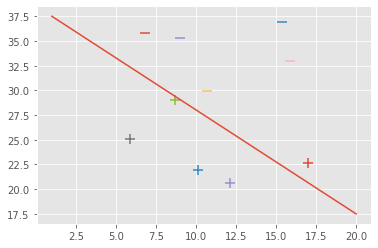

In [43]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if y[d] < 0:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
plt.plot([1,20],[37.5,17.5])

In [44]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [45]:
# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
model = svc.fit(X_std, y)

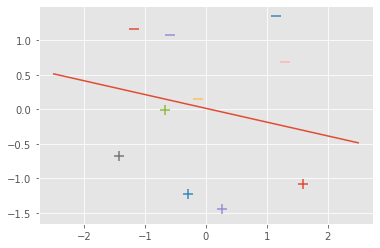

In [46]:
# Plot data points and color using their class
color = ['black' if c == -1 else 'red' for c in y]
# plt.scatter(X_std[:,0], X_std[:,1], c=color)
for d, sample in enumerate(X_std):
    # Plot the negative samples
    if y[d] < 0:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)


# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
# plt.axis("off"), 
plt.show();

<h1> MSE Linear Regression 3 ways </h1>

# 1. Closed form  Linear Regression (MSE)  in Numpy

## MSE LR: Random search for linear regression model

### Generate data artificially

In [6]:
import numpy as np
import copy

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
X = np.arange(1, 20)
print(X)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


The following are the **TRUE** ("Ideal") parameters of regression that will be used to generate a dataset.

In [8]:
b, m = 3, 1.5

In [9]:
y = m * X + b
print(y)

[ 4.5  6.   7.5  9.  10.5 12.  13.5 15.  16.5 18.  19.5 21.  22.5 24.
 25.5 27.  28.5 30.  31.5]


Add some random gaussian noise to the target variable $y$.

In [10]:
np.random.seed(21)
y += np.random.normal(loc=0.0, scale=3.0, size=len(X))
print(y)

[ 4.34410725  5.66641185 10.6253904   5.22978212 12.73616304  6.86683872
 12.88240685 14.29628613 19.88443213 17.96212215 17.66039914 25.1210655
 27.33297593 21.93231519 27.57577113 25.65565319 28.9870274  30.7716874
 27.67363242]


/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


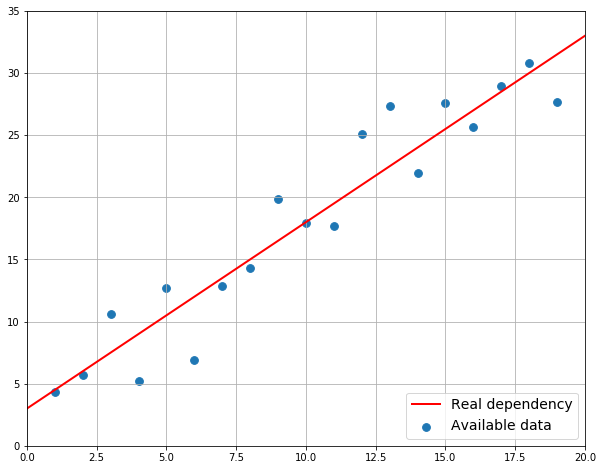

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, s=60, label="Available data")
#use two point to plot the TRUE line
plt.plot([0, 20], [b, m * 20 + b], "r", linewidth=2, label="Real dependency") 
plt.xlim([0, 20])
plt.ylim([0, 35])
plt.legend(loc="lower right", fontsize=14)
plt.grid("on")
plt.show()

Reshape data such that each row contains a training example as a vector.

In [12]:
X = X.reshape(-1, 1)
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]


Add a dummy  bias feature so we can learn the bias (aka intercept) term and slope via the normal equation.

In [13]:
# Concatenate a vector of 1s to X 
# Notice the square brackets [ ]  and NOT () when we use np.c_[]
X = np.c_[np.ones(X.shape[0]), X]
print(X)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]]


Generate random set of weights

In [14]:
np.random.seed(21)
sampled_weights = np.random.random(size=(100, 2)) * 20 - 10

In [15]:
print(sampled_weights[:5])

[[-9.02550238 -4.2178068 ]
 [ 4.41932694 -9.567675  ]
 [-5.88154469 -8.98453487]
 [-3.95456212  3.27820589]
 [-3.83771214  1.67182552]]


In [16]:
X.shape

(19, 2)

In [17]:
sampled_weights.shape

(100, 2)

Generate predictions for each weight vector

In [18]:
preds = np.dot(sampled_weights, X.T)

In [19]:
print("Predictions shape:\n", preds.shape)
print("\nPredictions:\n", preds)

Predictions shape:
 (100, 19)

Predictions:
 [[ -13.24330919  -17.46111599  -21.6789228  ...  -80.72821806
   -84.94602486  -89.16383166]
 [  -5.14834807  -14.71602307  -24.28369807 ... -158.23114809
  -167.79882309 -177.3664981 ]
 [ -14.86607956  -23.85061443  -32.83514929 ... -158.61863742
  -167.60317228 -176.58770715]
 ...
 [  -1.54789294    4.75337556   11.05464406 ...   99.27240311
   105.57367162  111.87494012]
 [  11.0267082    12.80435606   14.58200392 ...   39.46907396
    41.24672182   43.02436968]
 [   1.20258086    4.32012071    7.43766056 ...   51.08321842
    54.20075827   57.31829812]]


Calculate errors

In [20]:
errors = np.dot(sampled_weights, X.T) - y

MSE

In [21]:
mses = np.mean((errors)** 2, axis = 1)
print(mses.shape)
print(mses[:5])

(100,)
[ 5788.42555518 15637.88442017 16257.78048079   217.18009231
    34.89998699]


Find best weight

In [22]:
best_idx = np.argmin(mses)
print(best_idx)

53


In [23]:
sampled_weights[best_idx]

array([-6.98450904,  2.29527149])

In [24]:
b_rs, w_rs = sampled_weights[best_idx]
print("b_rs =", b_rs)
print("w_rs =", w_rs)

b_rs = -6.984509036567457
w_rs = 2.295271490015722


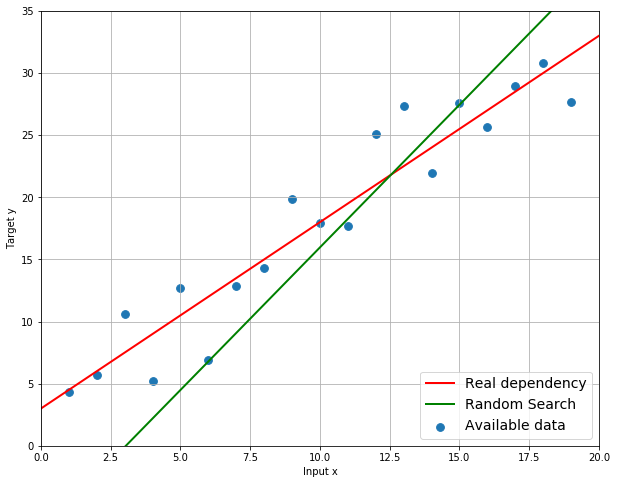

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 1], y, s=60, label="Available data")
plt.xlabel("Input x")
plt.ylabel("Target y")
plt.plot([0, 20], [b, m * 20 + b], "r", linewidth=2, label="Real dependency")
plt.plot([0, 20], [b_rs, w_rs * 20 + b_rs], "g", linewidth=2, label="Random Search")
plt.xlim([0, 20])
plt.ylim([0, 35])
plt.legend(loc="lower right", fontsize=14)
plt.grid("on")
plt.show()

In [26]:
print("Best fit RMSE:", mses[best_idx])
print("Real RMSE:", np.mean((m * X[:, 1] + b - y)**2))

Best fit RMSE: 30.244692005182312
Real RMSE: 7.231083196243735


## Closed form MSE LR:  Implement closed-form linear regression by hand

The objective function for linear regression, known as mean squared error (MSE),  is defined as the following:
$$
f(\mathbf{w}, b) = \frac{1}{m}\sum_{i=1}^{m}\left( (\mathbf{x_i^T}\cdot\mathbf{w} + b) - y_i\right)^2,\\
\text{where}  \space   \space m = \left|X_{\text{train}}\right|
$$

Note Google Colab has a nice equation editor. See [here](https://colab.research.google.com/drive/1xDyzAGUFy5OxvMpHaYxVYV9hnf0nAvln) for an example of how to edit Latex-based  equations.
To be able to treat weigths $\mathbf{w}$ and bias $b$ homogeneously we're going to augment the data with the "shell" feature (all $1$'s). Then we can add one more parameter to the weight vector and treat it as a *bias*.
$$
\mathbf{x}' :=
\begin{bmatrix}
\mathbf{1}\\
\mathbf{X}
\end{bmatrix},\quad
\boldsymbol{\theta} :=
\begin{bmatrix}
\mathbf{b}\\
\mathbf{W}
\end{bmatrix}
\\
f(\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^{m}\left(  \mathbf{x'}_i^{\text{T}} \cdot \boldsymbol{\theta}- y_i\right)^2
$$

Vector $\text{x}'$ is referred to as the augmented input data vector. 
To simplify it further and do it in "*tensor*" (vectorized) way let's rewrite it in matrix form. Let's introduce the data matrix (the same as dataframe we used everywhere above)

$$
\text{X} =
\begin{bmatrix}
\mathbf{x'}_1^{\text{T}}\\
\vdots\\
\mathbf{x'}_n^{\text{T}}
\end{bmatrix},\quad
\mathbf{y} = 
\begin{bmatrix}
y_1\\
\vdots\\
y_n
\end{bmatrix}
$$

Matrix $\text{X}$, the augmented input data matrix, contains objects in its rows and features in its columns. Vector $\mathbf{y}$ is a vector of answers. Then the objective function, MSE, can be rewritten as in matrix form as  follows:

$$
f(\boldsymbol{\theta}) = \frac{1}{m}\|\text{X}\cdot \boldsymbol{\theta} - \mathbf{y}\|^2
$$

This is often referred to as the **vectorized form** and helps simplify equations by dropping $\sum$  and code by drop the use of `for` loops.
Consequently, the gradient can be easily calculated in vectorized form as:

$$
\nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta}) = \frac{2}{m}\left(\text{X}\cdot \boldsymbol{\theta} - \mathbf{y}\right)^{\text{T}}\cdot \text{X}
$$

The first-order conditions (FOC) for optimality are as follows:

$$
\nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta}) = 0
$$

Then we can solve for $\theta$ as follows:

$$
\frac{2}{m}\left(\text{X}\cdot \boldsymbol{\theta} - \mathbf{y}\right)^{\text{T}}\cdot \text{X}' = 0\\
\boldsymbol{\theta}^{\text{T}}\text{X}^{\text{T}}\text{X} = \mathbf{y}^{\text{T}}\text{X}^{\text{T}}\\
(\text{X}^{\text{T}}\text{X})\boldsymbol{\theta}=\text{X}^{\text{T}}\mathbf{y}\\
\boldsymbol{\theta} = (\text{X}^{\text{T}}\text{X})^{-1}\text{X}^{\text{T}}\mathbf{y}
$$

This leads to the following  closed-form solution for a MSE-based linear regression model:
$$
\boldsymbol{\theta} = (\text{X}^{\text{T}}\text{X})^{-1}\text{X}^{\text{T}}\mathbf{y}
$$

This equation is commonly known as the **normal equation".

### TASK: Analytical solution to MSE Linear Regression
Given this background implement, implement the normal equation. Hint `np.linalg.inv(a square matrix)` inverts a square matrix.  

In [27]:
# Normal Equation:
A = np.dot(X.T,X)
theta = np.dot(y,np.dot(np.linalg.inv(A),X.T).T)
intercept, slope = theta[0], theta[1]
b_cf, m_cf = intercept, slope

print(f"Closed Form solution for theta(bias, slope): {np.round((b_cf, m_cf),3)}")
print(f"y = {np.round(m_cf,3)}x + {np.round(b_cf,3)} Learnt Model via linear regression")
print(f"y = {np.round(m,3)}  x + {np.round(b,3)}     TRUE   Model  ")

Closed Form solution for theta(bias, slope): [2.991 1.507]
y = 1.507x + 2.991 Learnt Model via linear regression
y = 1.5  x + 3     TRUE   Model  


Plot training data, true model equation, and Regression function obtained

In [28]:
X[:,1].reshape(-1,1)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.]])

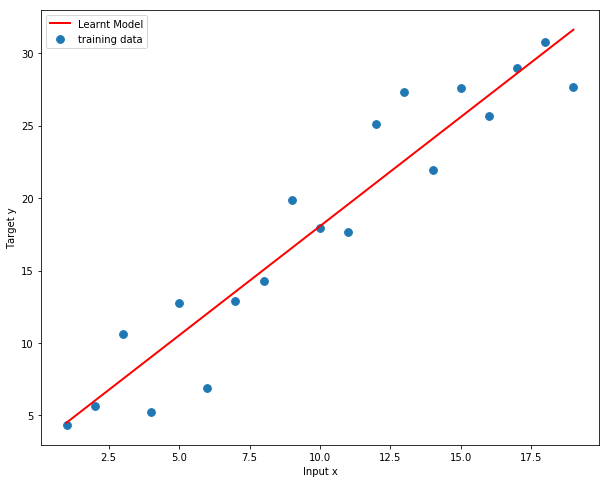

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 1], y, s=60, label="training data")
plt.xlabel("Input x")
plt.ylabel("Target y")

# plt.plot(X,theta*X,label = 'Learnt Model' )
plt.plot(X[:,1], m_cf * X[:,1] + b_cf, "r", linewidth=2, label='Learnt Model')
plt.legend()

plt.show()

# Boston Dataset via normal equation

## Boston House Prices

In this notebook, we're going to build a different regression model for predicting house prices in thousands of dollars given factors such as crime rate in neighborhood, number of schools, % lower status of the population, etc.

## Reading data

Boston dataset is extremely common in machine learning experiments thus it is embedded in sklearn.

In [30]:
from sklearn.datasets import load_boston
boston = load_boston()

Detailed description of dataset and features

In [31]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Create pandas dataframe with objects in rows and features in columns

In [32]:
import pandas as pd
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [33]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Exploratory data analysis (EDA)

All features are numerical, but note that some features are categorical (e.g., CHAS) while others are continuous.

In [34]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Let's also take a look into correlation matrix of features

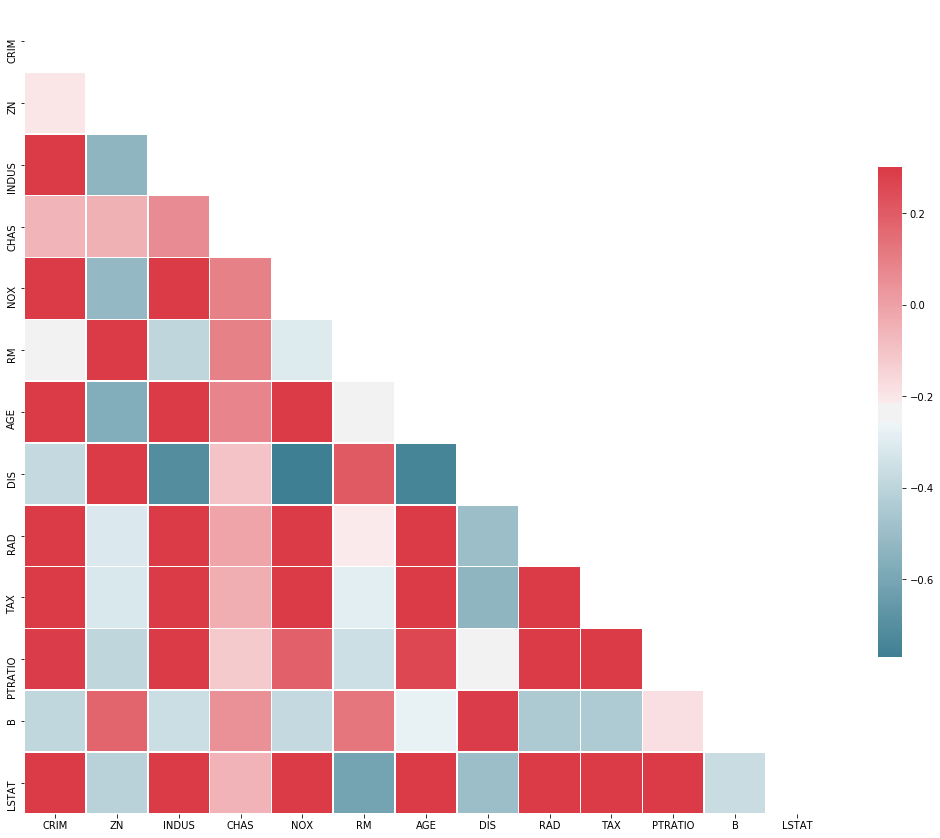

In [35]:
import seaborn as sns
# compute the correlation matrix
corr = X.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

## Preprocessing

### Splitting the data (train/test)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TASK: There are lots of features. Visualize any two of them vs prices, across the train and test data. 

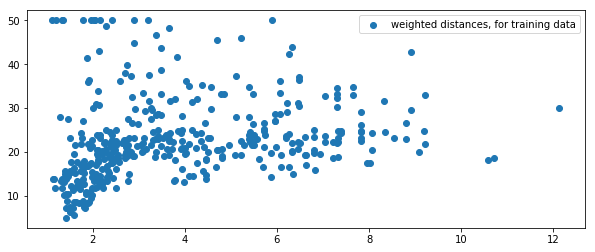

In [37]:
plt.figure(figsize=(10,4))
plt.scatter(X_train["DIS"],y_train, label = "weighted distances, for training data")
plt.legend()

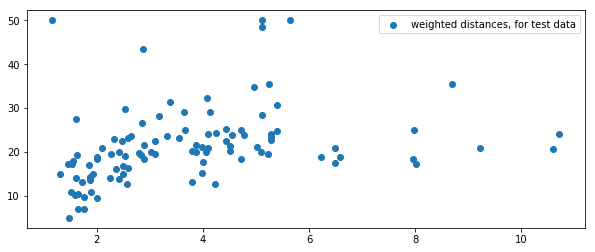

In [38]:
plt.figure(figsize=(10,4))
plt.scatter(X_test["DIS"],y_test, label = "weighted distances, for test data")
plt.legend()

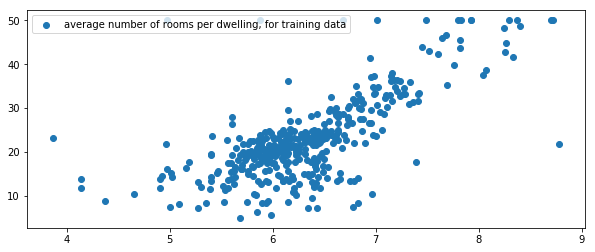

In [39]:
plt.figure(figsize=(10,4))
plt.scatter(X_train["RM"],y_train,label = "average number of rooms per dwelling, for training data")
plt.legend()

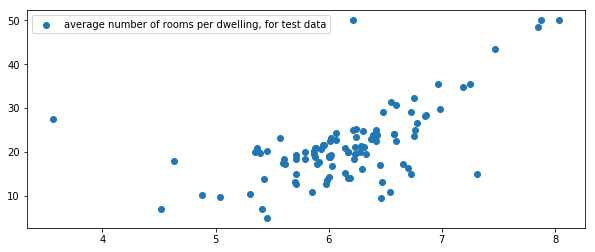

In [40]:
plt.figure(figsize=(10,4))
plt.scatter(X_test["RM"],y_test,label = "average number of rooms per dwelling, for test data")
plt.legend()

### Scaling

Normalize data in the range $(0,1)$ to make our data insensitive to the scale of features.

Note that we're going to learn normalization constants only on training set. That's done because the assumption is that test set is unreachable during training.

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

Transform test set with the same constants

In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 173 to 75
Data columns (total 13 columns):
CRIM       102 non-null float64
ZN         102 non-null float64
INDUS      102 non-null float64
CHAS       102 non-null float64
NOX        102 non-null float64
RM         102 non-null float64
AGE        102 non-null float64
DIS        102 non-null float64
RAD        102 non-null float64
TAX        102 non-null float64
PTRATIO    102 non-null float64
B          102 non-null float64
LSTAT      102 non-null float64
dtypes: float64(13)
memory usage: 11.2 KB


In [44]:
X_test = scaler.transform(X_test)

In [45]:
# y.hist()
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Plot a histogram of probability of 'House Prices'

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


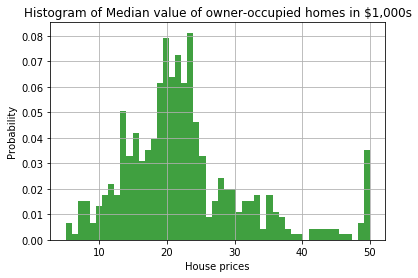

In [46]:
# the histogram of the data

n, bins, patches = plt.hist(y, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
# l = plt.plot(bins, y, 'r--', linewidth=1)


plt.xlabel('House prices')
plt.ylabel('Probability')
plt.title(r'Histogram of Median value of owner-occupied homes in $1,000s')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

### TASK: Plot distributions of each input variable

In [47]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


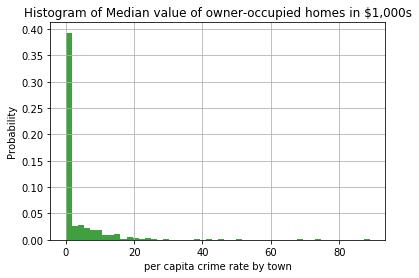

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


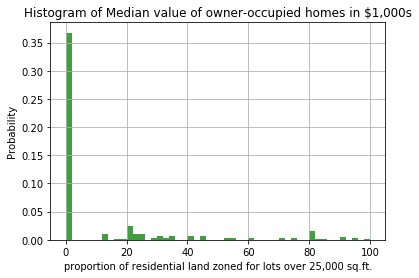

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


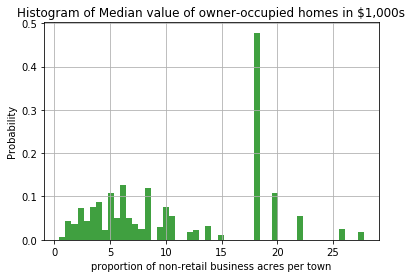

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


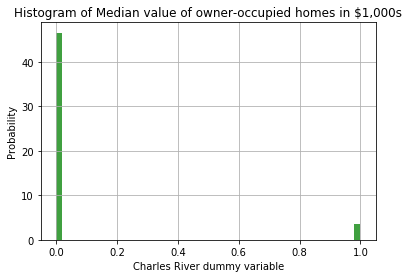

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


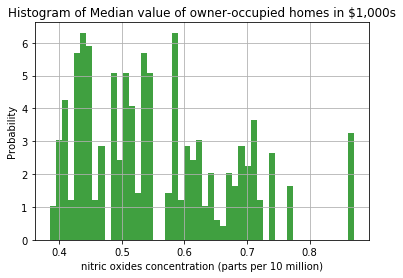

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


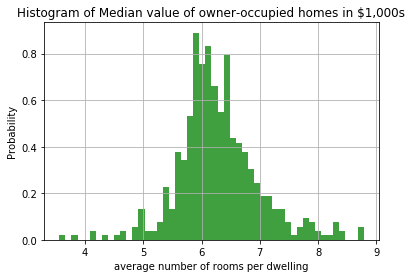

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


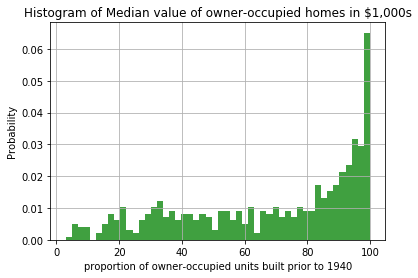

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


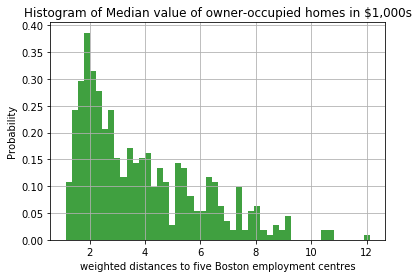

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


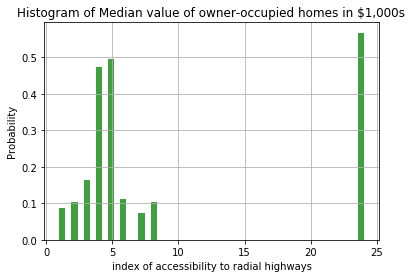

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


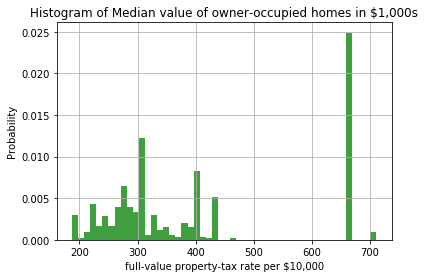

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


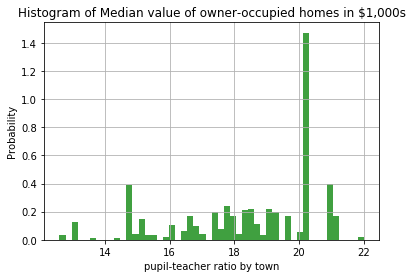

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


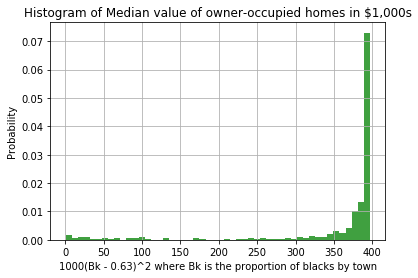

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


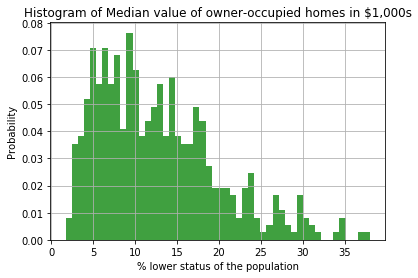

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

attributes = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
attributes_info = ['per capita crime rate by town', 'proportion of residential land zoned for lots over 25,000 sq.ft.',
                   'proportion of non-retail business acres per town', 
                   'Charles River dummy variable', 'nitric oxides concentration (parts per 10 million)', 
                   'average number of rooms per dwelling', 'proportion of owner-occupied units built prior to 1940',
                   'weighted distances to five Boston employment centres',
                   'index of accessibility to radial highways', 'full-value property-tax rate per $10,000',
                   'pupil-teacher ratio by town', '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
                   '% lower status of the population', 'Median value of owner-occupied homes in $1000s']
attributes_dict = dict(zip(attributes,attributes_info))

for i in attributes:
    n, bins, patches = plt.hist(X[i], 50, normed=1, facecolor='green', alpha=0.75)
    plt.xlabel(attributes_dict[i])
    plt.ylabel('Probability')
    plt.title(r'Histogram of Median value of owner-occupied homes in $1,000s')
    plt.grid(True)
    plt.show()

<h1>TASK: Extend Closed form MSE to consider Multiple Linear Regression </h1>

Via NORMAL eqn for multiple linear regression. Hint: use Numpy and adopt the code above. Demonstrate on the Boston House pricing data (split data into train-test; using 20% as a blind test set)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_train.shape

# Normal Equation:
A = np.dot(X_train.T,X_train)
A_inv = np.linalg.inv(A)
A_inv_X_train = np.dot(A_inv,X_train.T)
theta = np.dot(y_train,A_inv_X_train.T)

In [51]:
# b_cf, m_cf = intercept, slope
#intercept
b2_cf = np.array(theta[0])
w_cf = theta[1:]

print(f"Closed Form solution for theta(bias, slopes): {np.round((b2_cf),3),list(np.round((w_cf),3))}")
# print(f"y = {np.round(m_cf,3)}x + {np.round(b2_cf,3)} Learnt Model via linear regression")
# print(f"y = {np.round(m,3)}  x + {np.round(b,3)}     TRUE   Model  ")

Closed Form solution for theta(bias, slopes): (30.247, [-0.113, 0.03, 0.04, 2.784, -17.203, 4.439, -0.006, -1.448, 0.262, -0.011, -0.915, 0.012, -0.509])


#### Generate predictions for Test Data

In [52]:
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
X_test.shape

(102, 14)

In [53]:
preds = np.dot(X_test,theta)

In [54]:
print("Predictions shape:\n", preds.shape)
print("\nPredictions:\n", preds)

Predictions shape:
 (102,)

Predictions:
 [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548

Calculate errors

In [55]:
errors = preds - y_test

MSE

In [56]:
mses = np.mean((errors)** 2)
print(mses)
# print(mses[:5])

24.291119474974227


# 2. Sklearn Linear Regression

## Fitting

Use a very simple Linear Regression model. Scikit-learn uses the closed-form solution for Linear Regression problem thus it gives very good results.

In [57]:
from sklearn.linear_model import LinearRegression
model_sk = LinearRegression()

Fitting model on prepared data

In [58]:
model_sk.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 3. MSE LR Via GD: Implement simple linear regression via gradient descent 


The objective function, MSE, can be rewritten as in matrix (vectorized) form as  follows:

$$
f(\boldsymbol{\theta}) = \frac{1}{m}\|\text{X}'\cdot \boldsymbol{\theta} - \mathbf{y}\|^2
$$

This is often referred to as the **vectorized form** and helps simplify equations by dropping $\sum$  and code by drop the use of `for` loops.
Consequently, the gradient can be easily calculated in vectorized form as:

$$
\nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta}) = \frac{2}{m}\left(\text{X}'\cdot \boldsymbol{\theta} - \mathbf{y}\right)^{\text{T}}\cdot \text{X}'
$$

The first-order conditial  condition for optimality are as follows:

$$
\nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta}) = 0
$$

The gradient descent iteration step takes the following form:

$$\theta = \theta - \alpha * \nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta})$$ 

In [59]:
#generate a small dataset
np.random.seed(21)
b, w = 3, 1.5
X = np.arange(1, 20)
y = w * X + b
y += np.random.normal(loc=0.0, scale=3.0, size=len(X))
X = np.c_[np.ones(X.shape[0]), X]

In [60]:
#gradient descent
theta = np.array([1., 1.])  #initialize theta
learningRate = 0.001
Y = y.reshape(-1,1)  #convert y to nx1 matrix
m = y.shape[0]
for i in range(10000):
    gradient = (2/m)*X.T.dot(X.dot(theta) - y)
    theta -= learningRate * gradient
    if i%1000 ==0:
        print(f"iter {i:4} gradient vector is {np.round(gradient, 4)}; theta vector is {np.round(theta, 4)}")
        
print(f"Learnt Vector: {np.round(theta, 4)}")
print(f"True   Vector: {np.round([b,w], 4)}")

iter    0 gradient vector is [ -14.1268 -171.7028]; theta vector is [1.0141 1.1717]
iter 1000 gradient vector is [-0.5626  0.0434]; theta vector is [1.7653 1.6017]
iter 2000 gradient vector is [-0.3555  0.0274]; theta vector is [2.2164 1.5669]
iter 3000 gradient vector is [-0.2247  0.0173]; theta vector is [2.5014 1.545 ]
iter 4000 gradient vector is [-0.142   0.0109]; theta vector is [2.6816 1.5311]
iter 5000 gradient vector is [-0.0897  0.0069]; theta vector is [2.7954 1.5223]
iter 6000 gradient vector is [-0.0567  0.0044]; theta vector is [2.8674 1.5168]
iter 7000 gradient vector is [-0.0358  0.0028]; theta vector is [2.9128 1.5133]
iter 8000 gradient vector is [-0.0226  0.0017]; theta vector is [2.9416 1.5111]
iter 9000 gradient vector is [-0.0143  0.0011]; theta vector is [2.9597 1.5097]
Learnt Vector: [2.9712 1.5088]
True   Vector: [3.  1.5]


/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


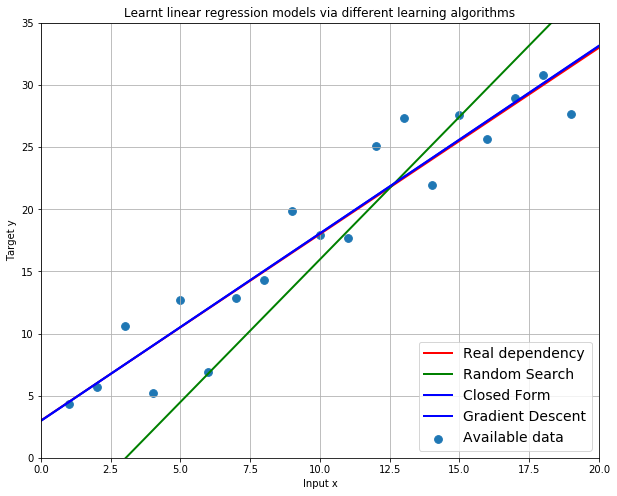

In [61]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 1], y, s=60, label="Available data")
plt.title('Learnt linear regression models via different learning algorithms')
plt.xlabel("Input x")
plt.ylabel("Target y")
plt.plot([0, 20], [b, w * 20 + b], "r", linewidth=2, label="Real dependency")
plt.plot([0, 20], [b_rs, w_rs * 20 + b_rs], "g", linewidth=2, label="Random Search")
plt.plot([0, 20], [b_cf, m_cf * 20 + b_cf], "b", linewidth=2, label="Closed Form")
plt.plot([0, 20], [theta[0], theta[1] * 20 + b_cf], "b", linewidth=2, label="Gradient Descent")
plt.xlim([0, 20])
plt.ylim([0, 35])
plt.legend(loc="lower right", fontsize=14)
plt.grid("on")
plt.show()

## Full example: Simple linear regression via gradient descent

### Generate some data with:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

Add some Gaussian noise to the data

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


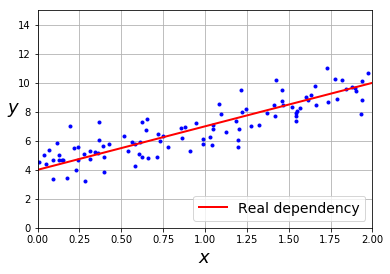

In [98]:
thetaTrue = np.array([4,3]) #true coefficents
np.random.seed(42)
X = 2 * np.random.rand(100,1)  #some random input data for X
y = thetaTrue[0] + thetaTrue[1] * X+np.random.randn(100,1) # generate y by adding some random noise elementwise

#generate some data so we can plot the true function
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(thetaTrue)

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X_new, y_predict, "r", linewidth=2, label="Real dependency")
plt.legend(loc="lower right", fontsize=14)
plt.grid("on")
_ =plt.axis([0,2,0,15])
plt.show()


In [99]:

def  MSE_Loss(theta,X,y):
    ''' 
    Calculates the cost for given X and Y. The following shows an example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100, lossFunction=MSE_Loss):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    lossFunction=MSE_Loss = the loss function used
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        #gradient descent
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = lossFunction(theta,X,y)
        
    return theta, cost_history, theta_history
      
lr =0.01
n_iter = 300

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Theta0: TRUE     {:0.3f},\nTheta1: TRUE     {:0.3f}'.format(thetaTrue[0],thetaTrue[1]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))  

Theta0:          3.184,
Theta1:          3.671
Theta0: TRUE     4.000,
Theta1: TRUE     3.000
Final cost/MSE:  5623.457


/Users/shah.peace/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


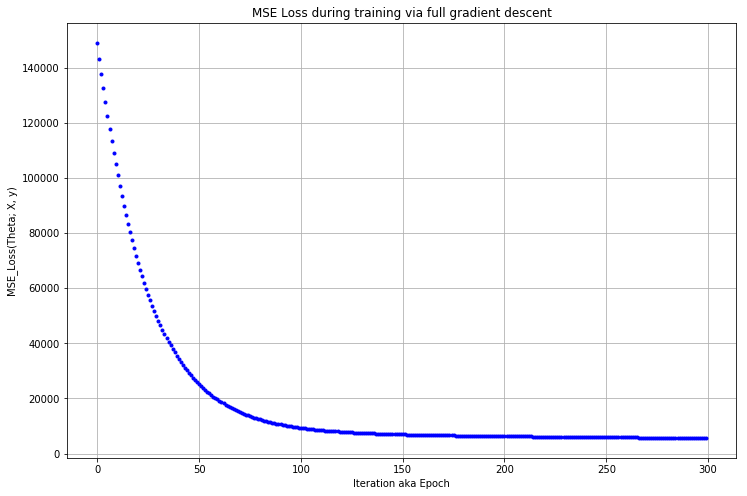

In [100]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('MSE_Loss(Theta; X, y)')
ax.set_xlabel('Iteration aka Epoch')
plt.title("MSE Loss during training via full gradient descent")
plt.grid("on")

_=ax.plot(range(n_iter),cost_history,'b.')

## TASK: Implement LASSO linear regression via Gradient from scratch
Implement LASSO linear regression via Gradient from scratch. Hint: use Numpy and adopt the code above. Demonstrate on the Boston House pricing data (split data into train-test; using 20% as a blind test set)

The derivative of absolute function  have three different cases (subgradients), when X > 1, X < 1 and X = 0.

* Option 1 → When X > 1, derivative = 1
* Option 2 → When X = 0, derivative = undefined
* Option 3 → When X < 1, derivative = -1

In [101]:
# Loading Boston Data
import pandas as pd
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [102]:
X_b = np.c_[np.ones(X_train.shape[0]),X_train]
# X_b.shape
theta = np.random.randn(len(X_b[1]),1)
# theta.shape

In [103]:
def d_abs(X):
    maskPos = (X>=0) * 1
    maskNeg = (X<0) * -1
    return(maskPos + maskNeg)

def  MSE_Loss_lasso(theta,X,y,lam):
   '''
   Calculates the cost for given X and Y. The following shows an example of a single dimensional X
   theta = Vector of thetas
   X     = Row of X's np.zeros((2,j))
   y     = Actual y's np.zeros((2,1))
   
   where:
       j is the no of features
   '''
   
   m = len(y)
   predictions = X.dot(theta)
   cost = (1/2*m) * np.sum(np.square(predictions-y)) + lam*np.abs(theta)
   return cost

def gradient_descent_lasso(X,y,theta,learning_rate=0.01,lam=0.1,iterations=100, lossFunction=MSE_Loss_lasso):
   '''
   X    = Matrix of X with added bias units
   y    = Vector of Y
   theta=Vector of thetas np.random.randn(j,1)
   learning_rate
   iterations = no of iterations
   lossFunction=MSE_Loss = the loss function used
   
   Returns the final theta vector and array of cost history over no of iterations
   '''
   
   m = len(y)
   cost_history = np.zeros(iterations)
   theta_history = np.zeros((iterations,2))
   for it in range(iterations):
        #gradient descent
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*(np.dot(X.T,(prediction - y.reshape(404,1)))) + lam*d_abs(theta)
        return theta
     
lr =0.01
n_iter = 300


X_b = np.c_[np.ones(X_train.shape[0]),X_train]
theta = np.random.randn(len(X_b[1]),1)

theta = gradient_descent_lasso(X_b,y_train,theta,lr,n_iter)
theta.shape

# print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
# print('Theta0: TRUE     {:0.3f},\nTheta1: TRUE     {:0.3f}'.format(thetaTrue[0],thetaTrue[1]))
# print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1])) 

(14, 1)

In [104]:
X_b.shape

(404, 14)

In [105]:
theta.shape

(14, 1)

Calculate errors

In [106]:
errors = np.dot(X_b, theta) - y_train

MSE

In [107]:
mses = np.mean((errors)** 2, axis = 1)
print(mses.shape)
print(mses[:5])

(404,)
[ 555384.29573032  270295.03811068  329243.72082182 1285021.4955656
  188172.23565629]



The objective function, MSE, can be rewritten as in matrix (vectorized) form as  follows:

$$
f(\boldsymbol{\theta}) = \frac{1}{m}\|\text{X}'\cdot \boldsymbol{\theta} - \mathbf{y}\|^2 + \lambda|\theta|
$$

This is often referred to as the **vectorized form** and helps simplify equations by dropping $\sum$  and code by drop the use of `for` loops.
Consequently, the gradient can be easily calculated in vectorized form as:

$$
\nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta}) = \frac{2}{m}\text{X}'^T\left(\text{X}'\cdot \boldsymbol{\theta} - \mathbf{y}\right)\cdot  + \lambda sgn(\theta)
$$

The first-order conditial  condition for optimality are as follows:

$$
\nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta}) = 0
$$

The gradient descent iteration step takes the following form:

$$\theta = \theta - \alpha * \nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta})$$ 

## TASK: Implement Ridge linear regression via Gradient from scratch 
Implement RIDGE linear regression via Gradient from scratch. Hint: use Numpy and adopt the code above. Demonstrate on the Boston House pricing data (split data into train-test; using 20% as a blind test set)

In [108]:
# Loading Boston Data
import pandas as pd
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [109]:
X_b = np.c_[np.ones(X_train.shape[0]),X_train]
# X_b.shape
theta = np.random.randn(len(X_b[1]),1)
# theta.shape

In [110]:
def  MSE_Loss_ridge(theta,X,y,lam):
   '''
   Calculates the cost for given X and Y. The following shows an example of a single dimensional X
   theta = Vector of thetas
   X     = Row of X's np.zeros((2,j))
   y     = Actual y's np.zeros((2,1))
   
   where:
       j is the no of features
   '''
   
   m = len(y)
   predictions = X.dot(theta)
   cost = (1/2*m) * np.sum(np.square(predictions-y)) + lam*np.linalg.norm(theta)
   return cost

def gradient_descent_lasso(X,y,theta,learning_rate=0.01,lam=0.1,iterations=100, lossFunction=MSE_Loss_ridge):
   '''
   X    = Matrix of X with added bias units
   y    = Vector of Y
   theta=Vector of thetas np.random.randn(j,1)
   learning_rate
   iterations = no of iterations
   lossFunction=MSE_Loss = the loss function used
   
   Returns the final theta vector and array of cost history over no of iterations
   '''
   
   m = len(y)
   cost_history = np.zeros(iterations)
   theta_history = np.zeros((iterations,2))
   for it in range(iterations):
        #gradient descent
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*(np.dot(X.T,(prediction - y.reshape(404,1)))) + 2*lam*np.abs(theta)
        return theta
     
lr =0.01
n_iter = 300


# X_b = np.c_[np.ones(X_train.shape[0]),X_train]
theta = np.random.randn(len(X_b[1]),1)

theta = gradient_descent_lasso(X_b,y_train,theta,lr,n_iter)
theta.shape


(14, 1)

Calculate errors

In [111]:
errors = np.dot(X_b, theta) - y_train

MSE

In [112]:
mses = np.mean((errors)** 2, axis = 1)
print(mses.shape)
print(mses[:5])

(404,)
[18936152.28820046  7400343.42439362  5714423.53567747 17072085.66325038
  7894884.41629838]
